In [55]:
#importing all libraries

import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from tensorflow.keras.models import Model 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import seaborn as sns

In [56]:
df1 = pd.read_csv(r"C:\Users\ankur\OneDrive\Desktop\Internship\allrecipe_afterCleaning\Recipe_Nutr_Dataset_001.csv")

C:\Users\ankur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [57]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,ingredients,url,partition,title,id,instructions,nutrition,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent
0,0,3,"[{'text': '2 12 cups milk'}, {'text': '1 12 cu...",http://www.food.com/recipe/crunchy-onion-potat...,test,Crunchy Onion Potato Bake,00003a70b1,[{'text': 'Preheat oven to 350 degrees Fahrenh...,"{'calories': '240.7', 'fatContent': '18', 'sat...",240.7,18,11.2,54.3,363.2,12.3,0.8,1.1,9.1
1,1,4,[{'text': '1 (3 ounce) package watermelon gela...,http://www.food.com/recipe/cool-n-easy-creamy-...,train,Cool 'n Easy Creamy Watermelon Pie,00004320bb,"[{'text': 'Dissolve Jello in boiling water.'},...","{'calories': '392.6', 'fatContent': '24.4', 's...",392.6,24.4,14.4,0,242.7,42.9,0.8,31.5,2.7
2,2,5,"[{'text': '12 cup shredded coconut'}, {'text':...",http://www.food.com/recipe/easy-tropical-beef-...,train,Easy Tropical Beef Skillet,0000631d90,"[{'text': 'In a large skillet, toast the cocon...","{'calories': '472.5', 'fatContent': '23.8', 's...",472.5,23.8,9.9,73.7,469.9,40.1,3.7,26.3,27.4
3,3,7,"[{'text': '6 -8 cups fresh rhubarb, or'}, {'te...",http://www.food.com/recipe/strawberry-rhubarb-...,train,Strawberry Rhubarb Dump Cake,00007bfd16,[{'text': 'Put ingredients in a buttered 9 x 1...,"{'calories': '431.8', 'fatContent': '12.6', 's...",431.8,12.6,5.6,20.3,428.4,78.1,2.7,62.4,4.1
4,4,9,"[{'text': '2 cups flour'}, {'text': '1 tablesp...",http://www.food.com/recipe/zucchini-nut-bread-...,train,Zucchini Nut Bread,0000973574,"[{'text': 'Sift dry ingredients.'}, {'text': '...","{'calories': '683.3', 'fatContent': '39', 'sat...",683.3,39,5.1,79.3,647.3,77.9,2.6,51.3,8.2


In [58]:
#making separate datasets for train, test and validation

df1_train_dataset = df1[df1['partition'] == 'train']  
df1_test_dataset = df1[df1['partition'] == 'test']
df1_validation_dataset = df1[df1['partition'] == 'val']

In [59]:
df1_train_dataset[['calories']] = df1_train_dataset[['calories']].apply(pd.to_numeric, errors='coerce')
df1_train_dataset[['fatContent']] = df1_train_dataset[['fatContent']].apply(pd.to_numeric, errors='coerce')
df1_train_dataset[['cholesterolContent']] = df1_train_dataset[['cholesterolContent']].apply(pd.to_numeric, errors='coerce')
df1_train_dataset[['carbohydrateContent']] = df1_train_dataset[['carbohydrateContent']].apply(pd.to_numeric, errors='coerce')
df1_train_dataset[['proteinContent']] = df1_train_dataset[['proteinContent']].apply(pd.to_numeric, errors='coerce')

C:\Users\ankur\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [60]:
df1_test_dataset[['calories']] = df1_test_dataset[['calories']].apply(pd.to_numeric, errors='coerce')
df1_test_dataset[['fatContent']] = df1_test_dataset[['fatContent']].apply(pd.to_numeric, errors='coerce')
df1_test_dataset[['cholesterolContent']] = df1_test_dataset[['cholesterolContent']].apply(pd.to_numeric, errors='coerce')
df1_test_dataset[['carbohydrateContent']] =df1_test_dataset[['carbohydrateContent']].apply(pd.to_numeric, errors='coerce')
df1_test_dataset[['proteinContent']] = df1_test_dataset[['proteinContent']].apply(pd.to_numeric, errors='coerce')


In [61]:
df1_validation_dataset[['calories']] = df1_validation_dataset[['calories']].apply(pd.to_numeric, errors='coerce')
df1_validation_dataset[['fatContent']] = df1_validation_dataset[['fatContent']].apply(pd.to_numeric, errors='coerce')
df1_validation_dataset[['cholesterolContent']] = df1_validation_dataset[['cholesterolContent']].apply(pd.to_numeric, errors='coerce')
df1_validation_dataset[['carbohydrateContent']] = df1_validation_dataset[['carbohydrateContent']].apply(pd.to_numeric, errors='coerce')
df1_validation_dataset[['proteinContent']] = df1_validation_dataset[['proteinContent']].apply(pd.to_numeric, errors='coerce')


In [62]:
df1_train_dataset =df1_train_dataset.dropna()
df1_test_dataset = df1_test_dataset.dropna()
df1_validation_dataset = df1_validation_dataset.dropna()

In [63]:
df_nutrients_train = [df1_train_dataset["calories"], df1_train_dataset["fatContent"], df1_train_dataset["cholesterolContent"], df1_train_dataset["carbohydrateContent"], df1_train_dataset["proteinContent"]]

df_nutrients_train = pd.concat(df_nutrients_train, axis=1)

In [64]:
df_nutrients_test = [df1_test_dataset["calories"], df1_test_dataset["fatContent"], df1_test_dataset["cholesterolContent"], df1_test_dataset["carbohydrateContent"], df1_test_dataset["proteinContent"]]

df_nutrients_test = pd.concat(df_nutrients_test, axis=1)

In [65]:
df_nutrients_val = [df1_validation_dataset["calories"], df1_validation_dataset["fatContent"], df1_validation_dataset["cholesterolContent"], df1_validation_dataset["carbohydrateContent"], df1_validation_dataset["proteinContent"]]

df_nutrients_val = pd.concat(df_nutrients_val, axis=1)

In [66]:
#StandardScaling to dataset

sc_X = StandardScaler()
df_reduced_train =  pd.DataFrame((sc_X.fit_transform(df_nutrients_train)), columns=['calories', 'carbohydrateContent', 'cholesterolContent', 'fatContent', 'proteinContent'])
df_reduced_test =  pd.DataFrame((sc_X.fit_transform(df_nutrients_test)), columns=['calories', 'carbohydrateContent', 'cholesterolContent', 'fatContent', 'proteinContent'])
df_reduced_val =  pd.DataFrame((sc_X.fit_transform(df_nutrients_val)), columns=['calories', 'carbohydrateContent', 'cholesterolContent', 'fatContent', 'proteinContent'])

In [67]:
#performing AutoEncoder on df_reduced_train


# Input information
col_num = df_reduced_train.shape[1]
input_dim = Input(shape=(col_num,))

# Encoding information
encoded = Dense(5, activation='relu')(input_dim)
'''encoded = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(32, activation='sigmoid')(encoded)
encoded = Dense(16, activation='sigmoid')(encoded)
encoded = Dense(8, activation='sigmoid')(encoded)'''
encoded = Dense(4, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

# Decoding information

decoded = Dense(4, activation='relu')(encoded)
'''decoded = Dense(8, activation='sigmoid')(decoded)
decoded = Dense(16, activation='sigmoid')(decoded)
decoded = Dense(32, activation='sigmoid')(decoded)
decoded = Dense(64, activation='sigmoid')(decoded)'''
decoded = Dense(5, activation='relu')(decoded)

# Autoencoder information (encoder + decoder)

autoencoder = Model(input_dim, decoded)

# Train the autoencoder

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(df_reduced_train, df_reduced_train, epochs=150, batch_size=150, shuffle=True, validation_data = (df_reduced_val, df_reduced_val))



Epoch 1/150
976/976 [==============================] - 2s 1ms/step - loss: 0.9316 - val_loss: 0.6051
Epoch 2/150
976/976 [==============================] - 1s 1ms/step - loss: 0.5905 - val_loss: 0.5650
Epoch 3/150
976/976 [==============================] - 1s 1ms/step - loss: 0.5739 - val_loss: 0.4893
Epoch 4/150
976/976 [==============================] - 1s 1ms/step - loss: 0.5044 - val_loss: 0.4805
Epoch 5/150
976/976 [==============================] - 1s 1ms/step - loss: 0.4562 - val_loss: 0.4765
Epoch 6/150
976/976 [==============================] - 1s 1ms/step - loss: 0.5806 - val_loss: 0.4753
Epoch 7/150
976/976 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4756
Epoch 8/150
976/976 [==============================] - 1s 1ms/step - loss: 0.4680 - val_loss: 0.4778
Epoch 9/150
976/976 [==============================] - 1s 1ms/step - loss: 0.4401 - val_loss: 0.4756
Epoch 10/150
976/976 [==============================] - 1s 1ms/step - loss: 0.4980 - val_lo

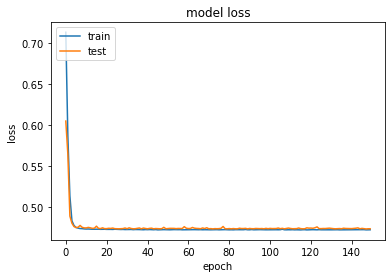

In [68]:
import matplotlib.pyplot as plt

plt.plot(autoencoder.history.history["loss"])
plt.plot(autoencoder.history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["train", "test"], loc="upper left")
plt.show()

In [69]:
# Encoder information for feature extraction

encoder = Model(inputs=input_dim, outputs=encoded)
encoded_input = Input(shape=(2,))
encoded_output = encoder.predict(df_reduced_test) #using X_test_demo bcz its no of columns is 5 which matches with X_train no of columns


# Show the encoded values
print(encoded_output[:5])

[[0.6868751  0.31889495]
 [0.6152319  0.292308  ]
 [0.6266637  0.30388594]
 [0.7923572  0.3501512 ]
 [0.70430505 0.37515548]]


In [70]:
after_encoding = pd.DataFrame({'Column1': encoded_output[:, 0], 'Column2': encoded_output[:, 1]})
print(after_encoding)

        Column1   Column2
0      0.686875  0.318895
1      0.615232  0.292308
2      0.626664  0.303886
3      0.792357  0.350151
4      0.704305  0.375155
...         ...       ...
31760  0.661482  0.307737
31761  0.634732  0.460439
31762  0.891247  0.365011
31763  0.610526  0.507580
31764  0.676998  0.325075

[31765 rows x 2 columns]


In [71]:
after_encoding_demo = after_encoding.copy(deep = True)

In [72]:
#now doing k-means on 'after_encoding' dataset

clustering_autoencoder = KMeans(n_clusters=13, precompute_distances="auto", n_jobs=-1)
after_encoding['clusters'] = clustering_autoencoder.fit_predict(after_encoding)
after_encoding

,Column1,Column2,clusters
0,0.686875,0.318895,4
1,0.615232,0.292308,4
2,0.626664,0.303886,4
3,0.792357,0.350151,0
4,0.704305,0.375155,0
...,...,...,...
31760,0.661482,0.307737,4
31761,0.634732,0.460439,10
31762,0.891247,0.365011,11
31763,0.610526,0.507580,10


In [73]:
#PCA on test data

reduced_data = PCA(n_components=2).fit_transform(df_reduced_test)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results

,pca1,pca2
0,-0.171191,-0.043226
1,-0.338231,-0.010844
2,-0.286831,-0.009966
3,0.115061,-0.095491
4,-0.062640,0.056378
...,...,...
31760,-0.206405,-0.047127
31761,-0.126997,0.073631
31762,0.409754,-0.137881
31763,-0.035600,0.195306


In [74]:
results_demo = results.copy(deep=True)
results_demo.shape

(31765, 2)

In [75]:
#performing k-means on the PCA

from sklearn.cluster import KMeans
clustering_PCA = KMeans(n_clusters=13, precompute_distances="auto", n_jobs=-1)
results['clusters']= clustering_PCA.fit_predict(results)
results

,pca1,pca2,clusters
0,-0.171191,-0.043226,11
1,-0.338231,-0.010844,0
2,-0.286831,-0.009966,0
3,0.115061,-0.095491,5
4,-0.062640,0.056378,11
...,...,...,...
31760,-0.206405,-0.047127,0
31761,-0.126997,0.073631,11
31762,0.409754,-0.137881,3
31763,-0.035600,0.195306,11


In [76]:
df_reduced_test_demo = df_reduced_test.copy(deep=True)
df_reduced_test_demo.shape

(31765, 5)

In [77]:
#performing k-means on the X_test data

from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=13, precompute_distances="auto", n_jobs=-1)
df_reduced_test['clusters']= clustering_kmeans.fit_predict(df_reduced_test)
df_reduced_test

,calories,carbohydrateContent,cholesterolContent,fatContent,proteinContent,clusters
0,-0.063502,-0.023006,-0.065704,-0.064195,-0.172945,0
1,-0.106626,-0.069202,-0.168096,-0.065824,-0.318572,0
2,-0.091330,-0.058478,-0.151314,-0.058493,-0.259917,0
3,-0.017825,0.011640,0.089864,-0.062891,0.168872,6
4,0.006981,-0.011183,-0.039493,0.041371,-0.096087,6
...,...,...,...,...,...,...
31760,-0.082358,-0.039780,-0.101155,-0.078042,-0.168900,0
31761,0.014429,-0.007883,-0.088521,0.039741,-0.187104,0
31762,-0.003513,-0.012832,0.242038,-0.052954,0.617887,3
31763,0.107305,0.041887,-0.147920,0.147425,-0.120358,0


In [26]:
'''#just to visualize after k-means on X_test

reduced_data = PCA(n_components=2).fit_transform(df_reduced_test)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()'''

'#just to visualize after k-means on X_test\n\nreduced_data = PCA(n_components=2).fit_transform(df_reduced_test)\nresults = pd.DataFrame(reduced_data,columns=[\'pca1\',\'pca2\'])\n\nsns.scatterplot(x="pca1", y="pca2", data=results)\nplt.title(\'K-means Clustering with 2 dimensions\')\nplt.show()'

In [78]:
#db index before autoencoder on test data

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters, precompute_distances="auto", n_jobs=-1).fit(df_reduced_test_demo)
    cluster_labels = cluster.labels_

    db_index = davies_bouldin_score(df_reduced_test_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The db_index_score before AutoEncoder :", db_index)
  

For no of clusters = 2  The db_index_score before AutoEncoder : 0.001249887183062616
For no of clusters = 3  The db_index_score before AutoEncoder : 0.001675312683641068
For no of clusters = 4  The db_index_score before AutoEncoder : 0.4344251376899957
For no of clusters = 5  The db_index_score before AutoEncoder : 0.5281304923231948
For no of clusters = 6  The db_index_score before AutoEncoder : 0.5564779847027713
For no of clusters = 7  The db_index_score before AutoEncoder : 0.6682230746756845
For no of clusters = 8  The db_index_score before AutoEncoder : 0.7165099204679781
For no of clusters = 9  The db_index_score before AutoEncoder : 0.6957611801208141
For no of clusters = 10  The db_index_score before AutoEncoder : 0.7627493781544527
For no of clusters = 11  The db_index_score before AutoEncoder : 0.7402342075327016
For no of clusters = 12  The db_index_score before AutoEncoder : 0.7736351892256974
For no of clusters = 13  The db_index_score before AutoEncoder : 0.8166910273884

In [79]:
#db index after autoencoder

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters, precompute_distances="auto", n_jobs=-1).fit(after_encoding_demo)
    cluster_labels = cluster.labels_

    db_index = davies_bouldin_score(after_encoding_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The db_index_score after AutoEncoder :", db_index)
  


For no of clusters = 2  The db_index_score after AutoEncoder : 0.0009227682053952972
For no of clusters = 3  The db_index_score after AutoEncoder : 0.0014334895003736744
For no of clusters = 4  The db_index_score after AutoEncoder : 0.32074846011675207
For no of clusters = 5  The db_index_score after AutoEncoder : 0.48070485789753825
For no of clusters = 6  The db_index_score after AutoEncoder : 0.537653826744901
For no of clusters = 7  The db_index_score after AutoEncoder : 0.5722344408357175
For no of clusters = 8  The db_index_score after AutoEncoder : 0.5873008165341872
For no of clusters = 9  The db_index_score after AutoEncoder : 0.6122520167301576
For no of clusters = 10  The db_index_score after AutoEncoder : 0.617266652820913
For no of clusters = 11  The db_index_score after AutoEncoder : 0.6153415942925868
For no of clusters = 12  The db_index_score after AutoEncoder : 0.623540546573728
For no of clusters = 13  The db_index_score after AutoEncoder : 0.611045283240627
For no o

In [80]:
#db index on PCA

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters, precompute_distances="auto", n_jobs=-1).fit(results_demo)
    cluster_labels = cluster.labels_

    db_index = davies_bouldin_score(results_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The db_index_score after AutoEncoder :", db_index)
  

For no of clusters = 2  The db_index_score after AutoEncoder : 0.0009329276314318847
For no of clusters = 3  The db_index_score after AutoEncoder : 0.001240402861467487
For no of clusters = 4  The db_index_score after AutoEncoder : 0.33269939106803903
For no of clusters = 5  The db_index_score after AutoEncoder : 0.4028214135069906
For no of clusters = 6  The db_index_score after AutoEncoder : 0.4639929387612267
For no of clusters = 7  The db_index_score after AutoEncoder : 0.4839726785204262
For no of clusters = 8  The db_index_score after AutoEncoder : 0.5442279349615868
For no of clusters = 9  The db_index_score after AutoEncoder : 0.6247160492798123
For no of clusters = 10  The db_index_score after AutoEncoder : 0.6132777143078249
For no of clusters = 11  The db_index_score after AutoEncoder : 0.5693230328721285
For no of clusters = 12  The db_index_score after AutoEncoder : 0.5922435160526895
For no of clusters = 13  The db_index_score after AutoEncoder : 0.5978486082147411
For no

In [81]:
#silhouette index before autoencoder

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
  
  
no_of_clusters = [13,14,15]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(df_reduced_test_demo)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(df_reduced_test_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score before AutoEncoder :", silhouette_avg)


For no of clusters = 13  The average silhouette_score before AutoEncoder : 0.39722658985364684
For no of clusters = 14  The average silhouette_score before AutoEncoder : 0.44013163672474087
For no of clusters = 15  The average silhouette_score before AutoEncoder : 0.41130273432761344


In [82]:
#silhouette index after autoencoder

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
  
  
no_of_clusters = [13,14,15]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(after_encoding_demo)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(after_encoding_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score after AutoEncoding :", silhouette_avg)

For no of clusters = 13  The average silhouette_score after AutoEncoding : 0.50829923
For no of clusters = 14  The average silhouette_score after AutoEncoding : 0.50788015
For no of clusters = 15  The average silhouette_score after AutoEncoding : 0.5091105


In [83]:
#silhouette index on PCA

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
  
  
no_of_clusters = [13,14,15]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(results_demo)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(results_demo, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score after AutoEncoding :", silhouette_avg)

For no of clusters = 13  The average silhouette_score after AutoEncoding : 0.477006741662783
For no of clusters = 14  The average silhouette_score after AutoEncoding : 0.43525951765700266
For no of clusters = 15  The average silhouette_score after AutoEncoding : 0.4368524504214669


In [ ]:
'''#silhouette index after autoencoder on Agglomerative

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
  
  
no_of_clusters = [15]
  
for n_clusters in no_of_clusters:
  
    cluster = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = cluster.fit_predict(after_encoding)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(after_encoding, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score after AutoEncoding Agglomerat:", silhouette_avg)'''

In [88]:
df1_test_dataset['clusters'] = after_encoding['clusters'].values 

In [90]:
df1_test_dataset['clusters'].value_counts()

4     14829
0      8271
11     3541
10     3087
8       838
7       644
5       273
3       135
9        93
12       48
6         4
2         1
1         1
Name: clusters, dtype: int64

In [91]:
after_encoding.shape

(31765, 3)

In [92]:
df1_test_dataset.head()

,Unnamed: 0,Unnamed: 0.1,ingredients,url,partition,title,id,instructions,nutrition,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent,clusters
0,0,3,"[{'text': '2 12 cups milk'}, {'text': '1 12 cu...",http://www.food.com/recipe/crunchy-onion-potat...,test,Crunchy Onion Potato Bake,00003a70b1,[{'text': 'Preheat oven to 350 degrees Fahrenh...,"{'calories': '240.7', 'fatContent': '18', 'sat...",240.7,18.0,11.2,54.3,363.2,12.3,0.8,1.1,9.1,4
16,16,36,"[{'text': 'nonstick cooking spray'}, {'text': ...",http://www.food.com/recipe/tex-mex-caponata-28602,test,Tex-Mex Caponata,0002491373,"[{'text': 'Preheat oven to 425F.'}, {'text': '...","{'calories': '56.6', 'fatContent': '1.2', 'sat...",56.6,1.2,0.1,0.0,41.2,11.3,4.2,4.7,1.9,4
25,25,61,"[{'text': '1 small butternut squash, peeled, d...",http://www.food.com/recipe/butternut-squash-so...,test,Butternut Squash Soup or Bisque (Roasting Method),00047059be,"[{'text': 'ROASTING: preheat oven to 450.'}, {...","{'calories': '121.9', 'fatContent': '5.1', 'sa...",121.9,5.1,2.2,8.9,462.6,15.8,2.5,4.8,4.8,4
38,38,83,[{'text': '1 (10 ounce) package frozen chopped...,http://www.food.com/recipe/gyro-meat-loaf-w-tz...,test,Gyro Meat Loaf W/ Tzatziki Sauce,00059477e2,"[{'text': 'If making your own sauce, prepare i...","{'calories': '435.7', 'fatContent': '30.6', 's...",435.7,30.6,13.4,136.8,441.2,13.1,2,1.6,26.0,0
44,44,97,"[{'text': '1 egg, beaten'}, {'text': '18 cup w...",http://www.food.com/recipe/vegetable-fritto-mi...,test,Vegetable Fritto Misto With Lemon Mayonnaise,0006604a20,[{'text': 'For the fritto misto: In a medium b...,"{'calories': '541.6', 'fatContent': '22.3', 's...",541.6,22.3,3.5,68.2,1831.5,77.1,9.8,6.2,12.9,0


In [93]:
#total calorie count from each cluster
calorie_sum_of_each_cluster = []

for i in range(13):
    sum = 0
    c = df1_test_dataset[df1_test_dataset['clusters'] == i]
    for j in c.index:
        sum = sum + c.loc[j].calories
    calorie_sum_of_each_cluster.append(sum)  
    
      

In [94]:
calorie_sum_of_each_cluster

[3410821.600000005,
 612854.6,
 434360.2,
 294931.10000000003,
 2742009.4999999916,
 1032578.1999999998,
 30777.3,
 1404904.8000000014,
 779611.5000000001,
 607553.5999999997,
 2388406.500000001,
 2215133.4000000022,
 303353.69999999995]

In [95]:
#total sum of calories of all clusters

total_sum = 0
for i in calorie_sum_of_each_cluster:
    total_sum = total_sum + i
print(total_sum)

16257296.0


In [96]:
#suppose BMR of user is 3000
BMR = 3000

In [97]:
#calorie count chosen from each cluster is divided into ratios:
#suppose BMR is 200
#if cluster 1 has 100 calorie, cluster 2 has 300 calorie, 3 has 200 and 4 has 400 calorie then
# from cluster 1 we would select (100/1000)* BMR = 20calorie.. so we will choose 20 calorie food randomly from cluster1.. similarly for other clusters

each_cluster_calories_after_ratio = []
for i in range(len(calorie_sum_of_each_cluster)):
    ratio = (calorie_sum_of_each_cluster[i]/(total_sum))* BMR
    each_cluster_calories_after_ratio.append(ratio)
    

In [98]:
each_cluster_calories_after_ratio

[629.407547232948,
 113.09161129870552,
 80.15358765688956,
 54.424382750981465,
 505.9899567554146,
 190.5442700926402,
 5.679413107813255,
 259.2506404509092,
 143.86368434209479,
 112.1134043447323,
 440.738699719806,
 408.7641757891353,
 55.97862645793002]

In [99]:
#putting index values from each cluster into list

df_index_list = []
for i in range(13):
    df_index_list.append(df1_test_dataset[df1_test_dataset['clusters'] == i].index.tolist())
    
    

In [100]:
%%time

import random

top_5 = []    #list to append all index values 
for x in range(5):   # 5 coz we want to recommend 4 dishes, depends on how many we want to recommend
    cal_list = []
    for i in range(len(df_index_list)):
        observe = 0
        sum = 0
        count = 0
        while(True):
            x = random.choice(df_index_list[i])   #choosing randomly any index from df_index_list
            j = df1_test_dataset.loc[x]   #getting the series based on random value x

            if j.calories > each_cluster_calories_after_ratio[i]:  # if calorie value after choosing random index > how much we need then continue
                observe = observe + 1
                if observe <= 5:
                    continue
                else:
                    break
            count = count + 1   # if cal value less than required then increment +1 to count
            if sum + j.calories <= each_cluster_calories_after_ratio[i]:    # if sum value + cal value less than required value then again append j.calories
                sum = sum + j.calories
                cal_list.append(x) #apending the index 

            elif ((sum + j.calories - each_cluster_calories_after_ratio[i]) <= 300):   #we will stop when sum exceedes 300
                sum = sum + j.calories
                cal_list.append(x)
                break

            elif count > len(df_index_list[i]):    #to stop infinite loop when count > len of index list we will break from loop
                break
    top_5.append(cal_list) 

Wall time: 76.8 ms


In [101]:
top_5 

[[111029, 25727, 130718, 97639, 6177, 163919, 172283, 158713, 87397],
 [40240, 127146, 6729, 88922, 58733, 5637],
 [16358, 176135, 41905, 84598, 12125, 210952, 178703, 14040, 46849, 144850],
 [154475, 36745, 80238, 120145, 104450, 89981, 24701, 84627],
 [74843, 77326, 33805, 119578, 123437, 119970]]

In [102]:
demo = df1_test_dataset.copy()

In [103]:
original_dataset = pd.DataFrame()
count = 0
for i in range(len(top_5)):
    for k in top_5[i]:
        j = demo.loc[k]
        original_dataset = original_dataset.append(j, ignore_index = True)

In [104]:
original_dataset

,Unnamed: 0,Unnamed: 0.1,calories,carbohydrateContent,cholesterolContent,clusters,fatContent,fiberContent,id,ingredients,instructions,nutrition,partition,proteinContent,saturatedFatContent,sodiumContent,sugarContent,title,url
0,119267.0,474267.0,367.8,10.9,130.1,0.0,32.4,4.6,75f73c6bf6,"[{'text': '12 head iceberg lettuce'}, {'text':...",[{'text': 'Coarsely chop salad greens and plac...,"{'calories': '367.8', 'fatContent': '32.4', 's...",test,10.7,9.2,431.3,3.7,Seafood chopped salad,http://www.food.com/recipe/seafood-chopped-sal...
1,25864.0,194302.0,175.6,0.0,61.7,0.0,12.5,0,3050a7cffa,[{'text': '2 chicken breasts (boneless & skinl...,"[{'text': 'Put chicken, sauce, and butter in c...","{'calories': '175.6', 'fatContent': '12.5', 's...",test,15.2,5.6,96.4,0,Crockpot Buffalo Chicken Tacos,http://www.food.com/recipe/crockpot-buffalo-ch...
2,144210.0,545776.0,300.5,47.7,78.8,0.0,11.0,0.9,87d53b97a7,"[{'text': '100 g brown sugar'}, {'text': '60 g...",[{'text': 'Combine brown sugar and butter in a...,"{'calories': '300.5', 'fatContent': '11', 'sat...",test,4.2,6.4,332.3,29.3,Pineapple and Cardamom Upside-Down Cake,http://www.food.com/recipe/pineapple-and-carda...
3,97862.0,451921.0,124.0,9.7,20.1,4.0,9.7,0.3,705b2a6d5c,"[{'text': 'saltine crackers'}, {'text': '1 cup...","[{'text': 'Preheat oven to 425.'}, {'text': 'C...","{'calories': '124', 'fatContent': '9.7', 'satu...",test,0.5,5.1,54.1,9.3,Chocolate Toffee Bars,http://www.food.com/recipe/chocolate-toffee-ba...
4,6183.0,103551.0,299.2,44.0,19.4,4.0,13.9,3.5,19a3dd18e0,"[{'text': '1 12 cups shredded coconut'}, {'tex...",[{'text': 'Cut banana and apple into small pie...,"{'calories': '299.2', 'fatContent': '13.9', 's...",test,3.4,8,94.2,34.6,Grandma's Ambrosia,http://www.food.com/recipe/grandmas-ambrosia-2...
5,177447.0,65612.0,152.5,23.9,1.9,4.0,4.3,1.2,1053557894,[{'text': '4 hot dog buns (New England style c...,"[{'text': 'In a medium bowl, mix the lobster, ...","{'calories': '152.5', 'fatContent': '4.3', 'sa...",test,4.3,0.8,268.5,3.6,New England Lobster Roll,http://www.food.com/recipe/new-england-lobster...
6,185816.0,711921.0,411.9,73.0,0.0,10.0,7.0,3.5,b0fe0b79b6,"[{'text': '2 ounces dry pasta'}, {'text': '1 c...","[{'text': 'Cook pasta in boiling water until ""...","{'calories': '411.9', 'fatContent': '7', 'satu...",test,14.5,1,1208.8,24.4,Pasta With Roasted Mushrooms and Marinara Sauce,http://www.food.com/recipe/pasta-with-roasted-...
7,172236.0,602893.0,408.6,35.8,211.1,11.0,29.2,4.6,95f221e288,"[{'text': '3 cups heavy whipping cream'}, {'te...",[{'text': 'Early in the day or a day head: In ...,"{'calories': '408.6', 'fatContent': '29.2', 's...",test,4.7,17.4,32.5,24.9,Winter Fruit Bowl With Almond Cream,http://www.food.com/recipe/winter-fruit-bowl-w...
8,87607.0,431000.0,299.6,19.1,154.5,11.0,24.2,1.6,6b225895ad,"[{'text': '3 12 ounces dark chocolate bars, ch...","[{'text': 'Melt chocolate, butter and 2tbsp wa...","{'calories': '299.6', 'fatContent': '24.2', 's...",test,3.4,14.2,37.6,15,Amazing Chili Chocolate Mousse,http://www.food.com/recipe/amazing-chili-choco...
9,40400.0,335672.0,501.2,30.7,100.3,0.0,34.9,7.7,5366c88b87,"[{'text': '6 red peppers, seeds removed'}, {'t...","[{'text': 'Preheat oven to 190degrees.'}, {'te...","{'calories': '501.2', 'fatContent': '34.9', 's...",test,21.9,18.3,1627.9,20.1,Mediterranean Stuffed Bell Peppers / Capsicums,http://www.food.com/recipe/mediterranean-stuff...


In [112]:
original_dataset[['title', 'calories']]

,title,calories
0,Seafood chopped salad,367.8
1,Crockpot Buffalo Chicken Tacos,175.6
2,Pineapple and Cardamom Upside-Down Cake,300.5
3,Chocolate Toffee Bars,124.0
4,Grandma's Ambrosia,299.2
5,New England Lobster Roll,152.5
6,Pasta With Roasted Mushrooms and Marinara Sauce,411.9
7,Winter Fruit Bowl With Almond Cream,408.6
8,Amazing Chili Chocolate Mousse,299.6
9,Mediterranean Stuffed Bell Peppers / Capsicums,501.2
